<a href="https://colab.research.google.com/github/Anuja-F/ML-Practice-Notebook/blob/master/subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser


In [3]:
dataset=pd.read_csv("appdata10.csv")
dataset.head()


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()


,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
dataset['hour']=dataset['hour'].astype(str)
dataset['hour']=dataset['hour'].str.slice(1,3).astype(int)

In [6]:
dataset2=dataset.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


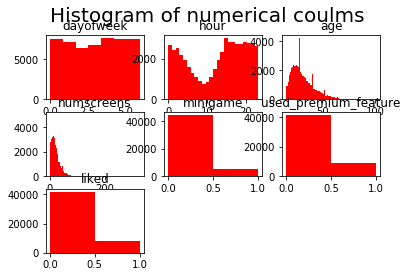

In [7]:
plt.suptitle("Histogram of numerical coulms",fontsize=20)
for i in range(1,dataset2.shape[1]+1):
  plt.subplot(3,3,i)
  f=plt.gca()
  f.set_title(dataset2.columns.values[i-1])
  vals=np.size(dataset2.iloc[:,i-1].unique())
  plt.hist(dataset2.iloc[:,i-1],bins=vals,color="red")

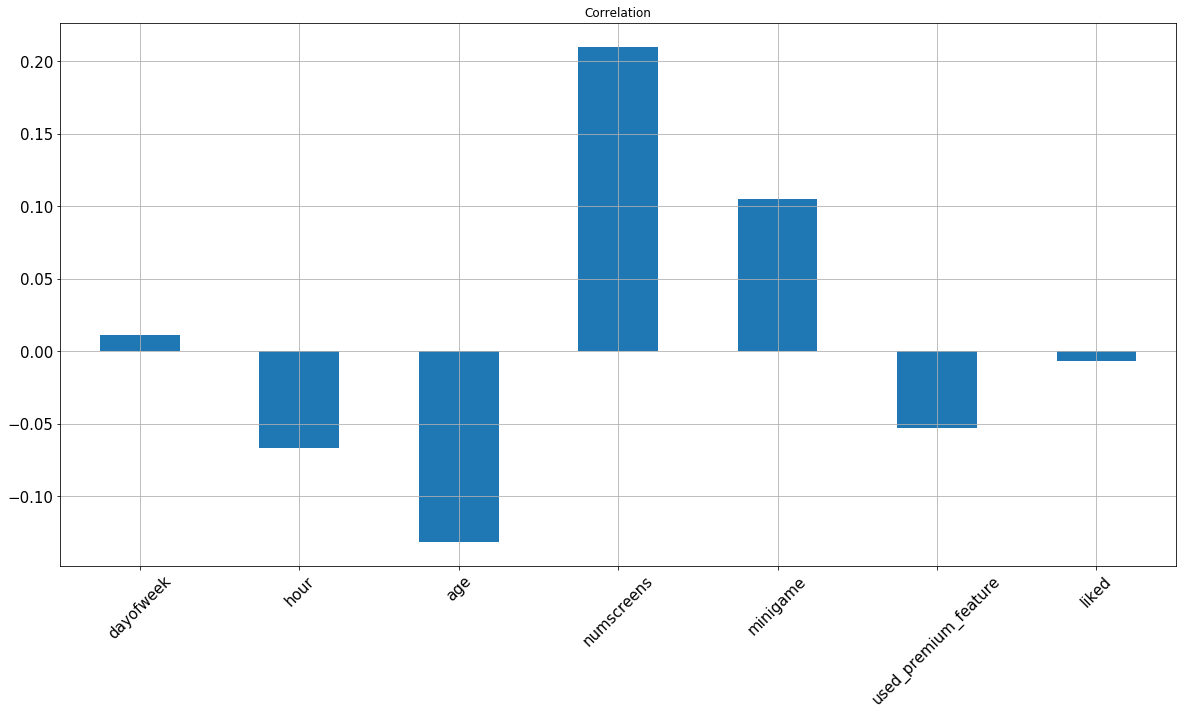

In [8]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10 ),
                  title="Correlation",
                  fontsize=15,rot=45,
                  grid=True)                            

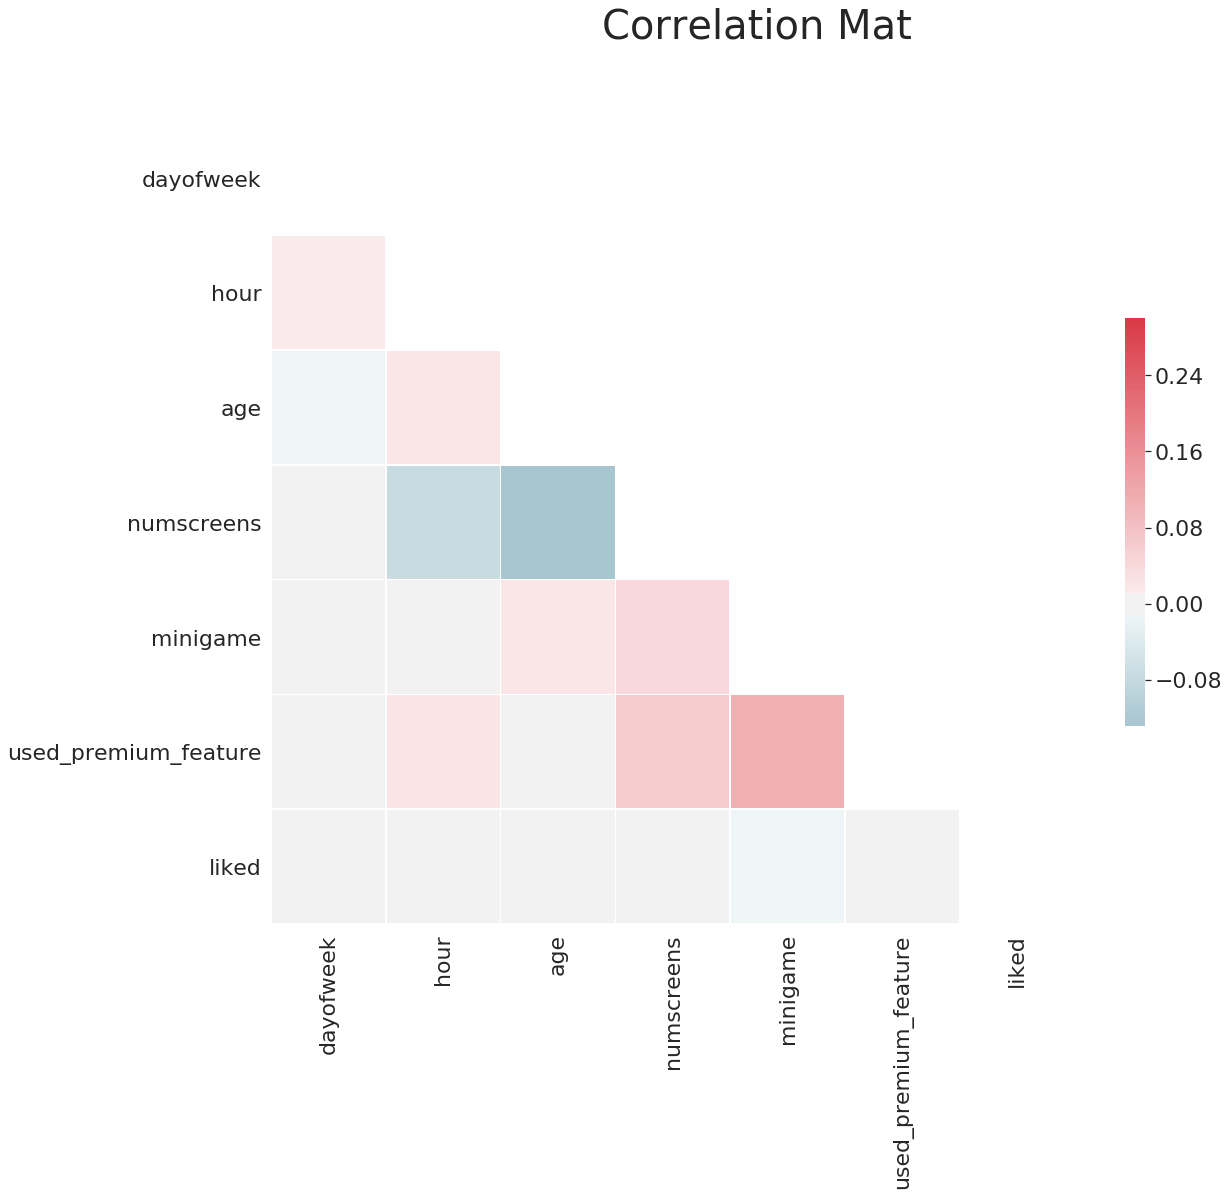

In [9]:
sns.set(style="white",font_scale=2)
corr=dataset2.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax=plt.subplots(figsize=(18,15))
f.suptitle("Correlation Mat",fontsize=40)
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.3,center=0,square=True,linewidth=0.5,cbar_kws={"shrink":0.5}) 

In [0]:
dataset.dtypes
dataset["first_open"]=[parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"]=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset["enrolled_date"]]

In [0]:
dataset["difference"]=(dataset.enrolled_date-dataset.first_open).astype("timedelta64")

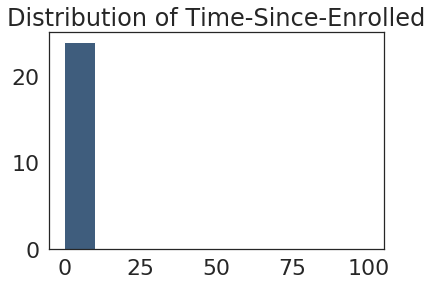

In [14]:
plt.hist(dataset["difference"].dropna(),color="#3F5D7D",range=[0,100])
plt.title("Distribution of Time-Since-Enrolled")
plt.show()

In [0]:
dataset.loc[dataset.difference>48,"enrolled"]=0
dataset=dataset.drop(columns=["difference","enrolled_date","first_open"])
